In [ ]:
!pip install path.py;
!pip install mne
from path import Path
import mne
from mne.time_frequency import tfr_morlet
import numpy as np
import math
import random
import os
import torch
import scipy.spatial.distance
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

from tqdm import tqdm
from tqdm import trange

import plotly.graph_objects as go
import plotly.express as px
from scipy import stats
import pickle
import math

     |████████████████████████████████| 6.9 MB 5.9 MB/s 


In [ ]:
directory = os.fsencode('//content//drive//MyDrive//BCI University of Bath//Motor imagery//MI Dataset//BCICIV_2a_gdf')

files = []
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".gdf"):
         file_path = directory.decode('ascii') +'//'+ filename;
         files.append(file_path)
         continue
     else:
         continue
print('End')
for i in range(len(files)):
  print(files[i])
filePath ='//content//drive//MyDrive//BCI University of Bath//Motor imagery//Bestmodelhalt-'+str(5)+'.pth'
raw=mne.io.read_raw_gdf(files[8])
print(raw.info)

End
//content//drive//MyDrive//BCI University of Bath//Motor imagery//MI Dataset//BCICIV_2a_gdf//A01T.gdf
//content//drive//MyDrive//BCI University of Bath//Motor imagery//MI Dataset//BCICIV_2a_gdf//A01E.gdf
//content//drive//MyDrive//BCI University of Bath//Motor imagery//MI Dataset//BCICIV_2a_gdf//A02T.gdf
//content//drive//MyDrive//BCI University of Bath//Motor imagery//MI Dataset//BCICIV_2a_gdf//A02E.gdf
//content//drive//MyDrive//BCI University of Bath//Motor imagery//MI Dataset//BCICIV_2a_gdf//A03T.gdf
//content//drive//MyDrive//BCI University of Bath//Motor imagery//MI Dataset//BCICIV_2a_gdf//A03E.gdf
//content//drive//MyDrive//BCI University of Bath//Motor imagery//MI Dataset//BCICIV_2a_gdf//A04T.gdf
//content//drive//MyDrive//BCI University of Bath//Motor imagery//MI Dataset//BCICIV_2a_gdf//A04E.gdf
//content//drive//MyDrive//BCI University of Bath//Motor imagery//MI Dataset//BCICIV_2a_gdf//A05T.gdf
//content//drive//MyDrive//BCI University of Bath//Motor imagery//MI Dataset//

/usr/local/lib/python3.7/dist-packages/mne/io/edf/edf.py:1047: DeprecationWarning:

The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead

<ipython-input-2-372d755226f9>:16: RuntimeWarning:

Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.



<Info | 7 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2004-12-16 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>


In [ ]:
rawdata = raw.get_data()
print(rawdata.shape)
events, _ = mne.events_from_annotations(raw)

(25, 686120)
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


In [ ]:
allLeftData = []
allRightData = []
allFootData = []
allTongueData = []
for i in range(events.shape[0]-1):
  if(events[i,2] == 7):
    leftData = rawdata[:,events[i,0]+250:events[i,0]+850]
    allLeftData.append(leftData)
  if(events[i,2] == 8):
    rightData = rawdata[:,events[i,0]+250:events[i,0]+850]
    allRightData.append(rightData)
  if(events[i,2] == 9):
    footData = rawdata[:,events[i,0]+250:events[i,0]+850]
    allFootData.append(footData)
  if(events[i,2] == 10):
    tongueData = rawdata[:,events[i,0]+250:events[i,0]+850]
    allTongueData.append(tongueData)
print(len(allLeftData))
print(len(allRightData))
print(len(allFootData))
print(len(allTongueData))

72
72
71
72


In [ ]:
allLeftData = np.array(allLeftData)
allRightData = np.array(allRightData)
allFootData = np.array(allFootData)
allTongueData = np.array(allTongueData)
allLeftData = allLeftData[:71,:22,:]
allRightData = allRightData[:71,:22,:]
allFootData = allFootData[:71,:22,:]
allTongueData = allTongueData[:71,:22,:]
print(allLeftData.shape)
print(allRightData.shape)
print(allFootData.shape)
print(allTongueData.shape)

(71, 22, 600)
(71, 22, 600)
(71, 22, 600)
(71, 22, 600)


In [ ]:
def standardlizeSig(data):
  base = np.mean(data)
  std = np.std(data)
  standardlized_data = (data-base)/std
  del base, std
  return standardlized_data

In [ ]:

allLeftDataTF = []
allRightDataTF = []
allFootDataTF = []
allTongueDataTF = []
for i in range(allLeftData.shape[0]):
  for j in range(5):
    allLeftDataTF.append(standardlizeSig(allLeftData[i,:,j*100:(j+2)*100]))
    allRightDataTF.append(standardlizeSig(allRightData[i,:,j*100:(j+2)*100]))
    allFootDataTF.append(standardlizeSig(allFootData[i,:,j*100:(j+2)*100]))
    allTongueDataTF.append(standardlizeSig(allTongueData[i,:,j*100:(j+2)*100]))
allLeftDataTF = np.array(allLeftDataTF)
allRightDataTF = np.array(allRightDataTF)
allFootDataTF = np.array(allFootDataTF)
allTongueDataTF = np.array(allTongueDataTF)
print(allLeftDataTF.shape,allRightDataTF.shape,allFootDataTF.shape,allTongueDataTF.shape)

(355, 22, 200) (355, 22, 200) (355, 22, 200) (355, 22, 200)


In [ ]:
ch_names = ['Fz','FC3','FC1','FCZ','FC2','FC4','C5','C3','C1','CZ','C2','C4','C6','CP3','CP1','CPZ','CP2','CP4','P3','PZ','P4','POZ']
info = mne.create_info(ch_names=ch_names,sfreq=250,ch_types='eeg')
epochs1 = mne.EpochsArray(allLeftDataTF[:,:,:],info)
epochs2 = mne.EpochsArray(allRightDataTF[:,:,:],info)
epochs3 = mne.EpochsArray(allFootDataTF[:,:,:],info)
epochs4 = mne.EpochsArray(allTongueDataTF[:,:,:],info)

Not setting metadata
Not setting metadata
355 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
355 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
355 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
355 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


In [ ]:
import time
start_time = time.time()
freqs = np.logspace(*np.log10([6, 30]), num=10)
n_cycles = freqs / 2.  # different number of cycle per frequency
print(n_cycles)
power1 = []
power2 = []
power3 = []
power4 = []
for evokedData in epochs1.iter_evoked():
    power_temp = tfr_morlet(evokedData, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                            return_itc=False, decim=3, n_jobs=1)

    power1.append(power_temp.data[:,:,:])
for evokedData in epochs2.iter_evoked():
    power_temp = tfr_morlet(evokedData, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                            return_itc=False, decim=3, n_jobs=1)
    power2.append(power_temp.data[:,:,:])
for evokedData in epochs3.iter_evoked():
    power_temp = tfr_morlet(evokedData, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                            return_itc=False, decim=3, n_jobs=1)
    power3.append(power_temp.data[:,:,:])

for evokedData in epochs4.iter_evoked():
    power_temp = tfr_morlet(evokedData, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                            return_itc=False, decim=3, n_jobs=1)

    power4.append(power_temp.data[:,:,:])

power1 = np.array(power1)
power2 = np.array(power2)
power3 = np.array(power3)
power4 = np.array(power4)
print(power1.shape,power2.shape,power3.shape,power4.shape)
delayTF = time.time() - start_time
totalSamples = 355 * 67 * 4
eachDelayTF = delayTF / totalSamples
print("--- %s seconds ---" % delayTF)
print("--- %s seconds per data entity---" % eachDelayTF)
# import random
# random_list = random.sample(range(0,power1.shape[0]),30)
# testPower1 = power1[random_list,:,:,:]
# testPower2 = power2[random_list,:,:,:]
# testPower3 = power3[random_list,:,:,:]
# testPower4 = power4[random_list,:,:,:]
# print(testPower1.shape,testPower2.shape,testPower3.shape,testPower4.shape)
# power1 = np.delete(power1,random_list,0)
# power2 = np.delete(power2,random_list,0)
# power3 = np.delete(power3,random_list,0)
# power4 = np.delete(power4,random_list,0)
# print(power1.shape,power2.shape,power3.shape,power4.shape)

[ 3.          3.58743952  4.28990744  5.12992784  6.1344353   7.33563854
  8.77205321 10.4897368  12.54376546 15.        ]
(355, 22, 10, 67) (355, 22, 10, 67) (355, 22, 10, 67) (355, 22, 10, 67)
--- 15.729824304580688 seconds ---
--- 0.00016533344865020695 seconds per data entity---


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

redius = 1
f = open('//content//drive//MyDrive//BCI University of Bath//Motor imagery//EEGLOC.csv',encoding='utf-8')
x1 = []
y = []
z = []
i=0
line = f.readline()
while line:
    locations = line.split(',')[1].split(' ')
    if locations[0] == '':
        x1.append(locations[1])
        y.append(locations[2])
        z.append(locations[3])
    else:
        x1.append(locations[0])
        y.append(locations[1])
        z.append(locations[2])
    i=i+1
    line = f.readline()
f.close()
x1 = np.array(x1).astype(float)
y = np.array(y).astype(float)
z = np.array(z).astype(float)

In [ ]:
#%% Data making
def parse_dataset(num_points = 200):
    train_points = []
    train_labels = []
    class_map = {'left hand', 'right hand','feet','tongue'}
    for i in range(len(power1)):
        leftDataPack = []
        for index3 in range(power1[i].shape[2]):
            tempPoints = []
            for index2 in range(power1[i].shape[1]):
                for index1 in range(power1[i].shape[0]):
                    myx = (x1[index1] + 25) * (index2+1) / 11 - 25
                    myy = (y[index1] - 50) * (index2+1) / 11 + 50
                    myz = (z[index1]) * (index2+1) / 11
                    pointPower = power1[i][index1,index2,index3]
                    point = [myx,myy,myz,pointPower]
                    tempPoints.append(point)
            train_points.append(tempPoints)
            train_labels.append(0)
    for i in range(len(power2)):
        rightDataPack = []
        for index3 in range(power2[i].shape[2]):
            tempPoints = []
            for index2 in range(power2[i].shape[1]):
                for index1 in range(power2[i].shape[0]):
                    myx = (x1[index1] + 25) * (index2+1) / 11 - 25
                    myy = (y[index1] - 50) * (index2+1) / 11 + 50
                    myz = (z[index1]) * (index2+1) / 11
                    pointPower = power2[i][index1,index2,index3]
                    point = [myx,myy,myz,pointPower]
                    tempPoints.append(point)
            train_labels.append(1)
            train_points.append(tempPoints)
    for i in range(len(power3)):
        feetPack = []
        for index3 in range(power3[i].shape[2]):
            tempPoints = []
            for index2 in range(power3[i].shape[1]):
                for index1 in range(power3[i].shape[0]):
                    myx = (x1[index1] + 25) * (index2+1) / 11 - 25
                    myy = (y[index1] - 50) * (index2+1) / 11 + 50
                    myz = (z[index1]) * (index2+1) / 11
                    pointPower = power3[i][index1,index2,index3]
                    point = [myx,myy,myz,pointPower]
                    tempPoints.append(point)
            train_labels.append(2)
            train_points.append(tempPoints)
    for i in range(len(power4)):
        tonguePack = []
        for index3 in range(power4[i].shape[2]):
            tempPoints = []
            for index2 in range(power4[i].shape[1]):
                for index1 in range(power4[i].shape[0]):
                    myx = (x1[index1] + 25) * (index2+1) / 11 - 25
                    myy = (y[index1] - 50) * (index2+1) / 11 + 50
                    myz = (z[index1]) * (index2+1) / 11
                    pointPower = power4[i][index1,index2,index3]
                    point = [myx,myy,myz,pointPower]
                    tempPoints.append(point)
            train_labels.append(3)
            train_points.append(tempPoints)
    return (np.array(train_points), np.array(train_labels),class_map)

In [ ]:
start_time = time.time()
train_points, train_labels, CLASS_MAP = parse_dataset()
delayFP = time.time() - start_time
eachDelayFP = delayFP / totalSamples
print("--- %s seconds ---" % delayFP)
print("--- %s seconds per data entity---" % eachDelayFP)

--- 110.62595701217651 seconds ---
--- 0.0011627702019358474 seconds per data entity---


In [ ]:
print(train_points.shape,train_labels.shape)

(95140, 220, 4) (95140,)


In [ ]:
real_trainPoints = []
tempTimeSeq = []
for i in range(train_points.shape[0]):
    # print(train_points[i,:,3])
    sortTemp = np.argsort(np.absolute(train_points[i,:,3]),axis=0)
    real_trainPoints.append(train_points[i,sortTemp[-130:],:])
real_trainPoints = np.array(real_trainPoints)
print(real_trainPoints.shape)
from sklearn.model_selection import train_test_split
def augment(points, label):
    # jitter points
    points += tf.random.uniform(points.shape, -0.005, 0.005, dtype=tf.float64)
    # shuffle points
    points = tf.random.shuffle(points)
    return points, label
  #80% 20%, 60%,20%
Xx, val_points, Yy, val_labels = train_test_split(real_trainPoints, train_labels, test_size=0.2, random_state=42)
train_points, test_points, train_labels, test_labels = train_test_split(Xx, Yy, test_size=0.25, random_state=42)
BATCH_SIZE = 32

(95140, 130, 4)


In [ ]:
print(train_points.shape,val_points.shape,test_points.shape,train_labels.shape,val_labels.shape,test_labels.shape)#,val_points.shape,val_labels.shape
print(val_labels[-500:])

(57084, 130, 4) (19028, 130, 4) (19028, 130, 4) (57084,) (19028,) (19028,)
[0 3 2 0 2 1 1 0 2 0 1 0 1 0 3 0 1 1 0 2 3 3 3 3 3 2 0 3 2 1 0 0 2 0 1 2 1
 3 2 1 2 2 2 3 3 3 2 0 2 1 2 1 0 3 3 2 3 2 2 3 2 0 0 3 1 2 1 0 3 0 3 3 2 3
 1 1 0 0 1 0 2 1 2 2 0 2 2 3 2 0 3 1 3 2 2 2 3 1 2 3 1 2 1 0 3 3 2 2 3 0 3
 1 2 3 3 1 3 0 2 2 1 2 3 1 3 2 0 0 2 1 2 2 3 3 1 0 0 2 1 0 3 2 0 2 1 1 3 0
 2 3 0 2 3 3 3 2 1 0 3 1 0 0 0 0 1 3 2 1 1 3 1 2 2 2 2 3 2 0 1 1 3 3 3 3 1
 3 0 3 3 1 0 1 1 2 1 3 2 3 1 2 2 1 1 0 2 3 1 1 3 1 1 0 3 2 0 1 2 0 2 1 1 3
 0 0 1 3 3 3 0 0 1 1 3 2 2 3 3 3 0 0 0 2 2 3 2 2 0 0 3 3 3 2 2 3 0 1 2 1 3
 0 0 2 3 1 2 0 3 2 1 3 3 2 3 1 1 0 3 1 1 2 0 1 3 1 0 0 0 0 1 1 1 0 1 0 0 0
 3 2 3 1 3 1 3 2 2 1 2 0 3 1 2 2 2 2 0 2 2 2 2 1 2 3 1 3 1 0 1 2 3 0 3 3 2
 3 1 1 2 2 0 3 0 0 2 0 1 1 1 1 2 3 2 1 2 1 2 3 2 1 2 0 2 3 1 1 2 1 1 3 3 3
 3 3 0 1 1 1 0 3 1 1 2 1 0 2 2 0 2 2 3 0 0 3 1 1 1 3 2 3 1 1 3 1 1 1 0 3 0
 0 2 2 2 0 0 1 2 1 1 0 3 1 2 1 0 0 1 1 2 1 0 3 1 0 2 3 1 0 0 0 3 0 1 2 0 3
 0 1 3 1 1 3 2 0 3 1 0 1 

In [ ]:
class PointCloudData(Dataset):
    def __init__(self, data, labels, valid=False, folder="train"):
        self.data = data
        self.labels = labels
        # self.transforms = transform if not valid else default_transforms()
        self.valid = valid

    def __len__(self):
        return self.data.shape[0]

    def __preproc__(self, file):
        verts, faces = read_off(file)
        if self.transforms:
            pointcloud = self.transforms((verts, faces))
        return pointcloud

    def __getitem__(self, idx):
        pointcloud = self.data[idx]
        # print(pointcloud.shape)
        category = self.labels[idx]
        # pointcloud = self.__preproc__(pointcloud)
        return {'pointcloud': pointcloud, 
                'category': category}

In [ ]:
train_ds = PointCloudData(train_points,train_labels)
valid_ds = PointCloudData(val_points,val_labels)
test_ds = PointCloudData(test_points,test_labels)

In [ ]:
train_loader = DataLoader(dataset=train_ds, batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset=valid_ds, batch_size=64)
test_loader = DataLoader(dataset=test_ds, batch_size=64)

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F

class Tnet(nn.Module):
   def __init__(self, k=4):
      super().__init__()
      self.k=k
      self.conv1 = nn.Conv1d(k,64,1)
      self.conv2 = nn.Conv1d(64,128,1)
      self.conv3 = nn.Conv1d(128,1024,1)
      self.fc1 = nn.Linear(1024,512)
      self.fc2 = nn.Linear(512,256)
      self.fc3 = nn.Linear(256,k*k)

      self.bn1 = nn.BatchNorm1d(64)
      self.bn2 = nn.BatchNorm1d(128)
      self.bn3 = nn.BatchNorm1d(1024)
      self.bn4 = nn.BatchNorm1d(512)
      self.bn5 = nn.BatchNorm1d(256)

   def forward(self, input):
      # input.shape == (bs,n,3)
      bs = input.size(0)
      # print(input.size())
      xb = F.relu(self.bn1(self.conv1(input)))
      xb = F.relu(self.bn2(self.conv2(xb)))
      xb = F.relu(self.bn3(self.conv3(xb)))
      pool = nn.MaxPool1d(xb.size(-1))(xb)
      flat = nn.Flatten(1)(pool)
      xb = F.relu(self.bn4(self.fc1(flat)))
      xb = F.relu(self.bn5(self.fc2(xb)))
      
      #initialize as identity
      init = torch.eye(self.k, requires_grad=True).repeat(bs,1,1)
      if xb.is_cuda:
        init=init.cuda()
      matrix = self.fc3(xb).view(-1,self.k,self.k) + init
      return matrix


class Transform(nn.Module):
   def __init__(self):
        super().__init__()
        self.input_transform = Tnet(k=4)
        self.feature_transform = Tnet(k=64)
        self.conv1 = nn.Conv1d(4,64,1)

        self.conv2 = nn.Conv1d(64,128,1)
        self.conv3 = nn.Conv1d(128,1024,1)
       

        self.bn1 = nn.BatchNorm1d(64)
        self.bn2 = nn.BatchNorm1d(128)
        self.bn3 = nn.BatchNorm1d(1024)
       
   def forward(self, input):
        matrix3x3 = self.input_transform(input)
        # batch matrix multiplication
        # print(torch.transpose(input,1,2).size(),matrix3x3.size())
        xb = torch.bmm(torch.transpose(input,1,2), matrix3x3).transpose(1,2)

        xb = F.relu(self.bn1(self.conv1(xb)))

        matrix64x64 = self.feature_transform(xb)
        xb = torch.bmm(torch.transpose(xb,1,2), matrix64x64).transpose(1,2)

        xb = F.relu(self.bn2(self.conv2(xb)))
        xb = self.bn3(self.conv3(xb))
        xb = nn.MaxPool1d(xb.size(-1))(xb)
        output = nn.Flatten(1)(xb)
        return output, matrix3x3, matrix64x64

class PointNet(nn.Module):
    def __init__(self, classes = 4):
        super().__init__()
        self.transform = Transform()
        self.fc1 = nn.Linear(1024, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, classes)
        
        self.bn1 = nn.BatchNorm1d(512)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout = nn.Dropout(p=0.3)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, input):
        # print(input.size())
        xb, matrix3x3, matrix64x64 = self.transform(input)
        xb = F.relu(self.bn1(self.fc1(xb)))
        xb = F.relu(self.bn2(self.dropout(self.fc2(xb))))
        output = self.fc3(xb)
        return self.logsoftmax(output), matrix3x3, matrix64x64

In [ ]:
def pointnetloss(outputs, labels, m3x3, m64x64, alpha = 0.0001):
    criterion = torch.nn.NLLLoss()
    bs=outputs.size(0)
    id3x3 = torch.eye(4, requires_grad=True).repeat(bs,1,1)
    id64x64 = torch.eye(64, requires_grad=True).repeat(bs,1,1)
    if outputs.is_cuda:
        id3x3=id3x3.cuda()
        id64x64=id64x64.cuda()
    diff3x3 = id3x3-torch.bmm(m3x3,m3x3.transpose(1,2))
    diff64x64 = id64x64-torch.bmm(m64x64,m64x64.transpose(1,2))
    return criterion(outputs, labels) + alpha * (torch.norm(diff3x3)+torch.norm(diff64x64)) / float(bs)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
pointnet = PointNet()
pointnet.to(device)
optimizer = torch.optim.Adam(pointnet.parameters(), lr=0.001)
def train(model, train_loader, val_loader=None,  epochs=60, save=True):
    best_val_acc = 0
    for epoch in range(epochs): 
        pointnet.train()
        running_loss = 0.0
        i = 0
        trainTotal = 0
        trainCorrect = 0
        with tqdm(train_loader, unit="batch") as tepoch:
          for data in tepoch:
            tepoch.set_description(f"Epoch {epoch+1}")
        # for i, data in enumerate(train_loader, 0):
            i= i + 1
            inputs, labels = data['pointcloud'].to(device).float(), data['category'].to(device)
            optimizer.zero_grad()
            outputs, m3x3, m64x64 = pointnet(inputs.transpose(1,2))

            loss = pointnetloss(outputs, labels, m3x3, m64x64)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            trainTotal += labels.size(0)
            trainCorrect += (predicted == labels).sum().item()
            # print(trainCorrect, trainTotal)
            # if i % 10 == 9:    # print every 10 mini-batches
            #         print('[Epoch: %d, Batch: %4d / %4d], loss: %.3f' %
            #             (epoch + 1, i + 1, len(train_loader), running_loss / 10))
            #         running_loss = 0.0
            accuracy = 100. * trainCorrect / trainTotal
            tepoch.set_postfix(loss=loss.item(), accuracy=str("{:.2f}".format(accuracy))+'%')

        pointnet.eval()
        correct = total = 0

        # validation

        if val_loader:
            with torch.no_grad():
                for data in val_loader:
                    inputs, labels = data['pointcloud'].to(device).float(), data['category'].to(device)
                    outputs, __, __ = pointnet(inputs.transpose(1,2))
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
            val_acc = 100. * correct / total
            print('Valid accuracy:'+str("{:.2f}".format(val_acc))+'%')

        # save the model
        if val_acc> best_val_acc:
            print('Weight need to be refreshed')
            best_val_acc = val_acc
            torch.save(pointnet.state_dict(), filePath)

cuda:0


In [ ]:
train(pointnet, train_loader, valid_loader,  save=False)

Epoch 1:   0%|          | 0/1784 [00:00<?, ?batch/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:652: UserWarning:

Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)

Epoch 1: 100%|██████████| 1784/1784 [00:58<00:00, 30.53batch/s, accuracy=25.43%, loss=1.43]


Valid accuracy:25.84%
Weight need to be refreshed


Epoch 2: 100%|██████████| 1784/1784 [00:57<00:00, 31.02batch/s, accuracy=25.14%, loss=1.41]


Valid accuracy:24.37%


Epoch 3: 100%|██████████| 1784/1784 [00:56<00:00, 31.42batch/s, accuracy=25.47%, loss=1.37]


Valid accuracy:24.88%


Epoch 4: 100%|██████████| 1784/1784 [00:57<00:00, 31.30batch/s, accuracy=25.14%, loss=1.43]


Valid accuracy:25.33%


Epoch 5: 100%|██████████| 1784/1784 [00:57<00:00, 31.24batch/s, accuracy=25.46%, loss=1.39]


Valid accuracy:26.11%
Weight need to be refreshed


Epoch 6: 100%|██████████| 1784/1784 [00:58<00:00, 30.58batch/s, accuracy=25.53%, loss=1.39]


Valid accuracy:24.85%


Epoch 7: 100%|██████████| 1784/1784 [00:57<00:00, 31.17batch/s, accuracy=25.38%, loss=1.39]


Valid accuracy:24.83%


Epoch 8: 100%|██████████| 1784/1784 [00:58<00:00, 30.56batch/s, accuracy=25.98%, loss=1.39]


Valid accuracy:25.73%


Epoch 9: 100%|██████████| 1784/1784 [00:57<00:00, 31.27batch/s, accuracy=25.87%, loss=1.4]


Valid accuracy:26.91%
Weight need to be refreshed


Epoch 10: 100%|██████████| 1784/1784 [00:58<00:00, 30.67batch/s, accuracy=26.22%, loss=1.38]


Valid accuracy:26.88%


Epoch 11: 100%|██████████| 1784/1784 [00:58<00:00, 30.67batch/s, accuracy=26.56%, loss=1.41]


Valid accuracy:26.65%


Epoch 12: 100%|██████████| 1784/1784 [00:56<00:00, 31.51batch/s, accuracy=26.87%, loss=1.38]


Valid accuracy:27.80%
Weight need to be refreshed


Epoch 13: 100%|██████████| 1784/1784 [00:57<00:00, 31.23batch/s, accuracy=26.86%, loss=1.36]


Valid accuracy:27.27%


Epoch 14: 100%|██████████| 1784/1784 [00:57<00:00, 31.08batch/s, accuracy=27.46%, loss=1.38]


Valid accuracy:27.81%
Weight need to be refreshed


Epoch 15: 100%|██████████| 1784/1784 [00:58<00:00, 30.69batch/s, accuracy=27.34%, loss=1.43]


Valid accuracy:28.01%
Weight need to be refreshed


Epoch 16: 100%|██████████| 1784/1784 [00:57<00:00, 30.82batch/s, accuracy=27.20%, loss=1.38]


Valid accuracy:28.58%
Weight need to be refreshed


Epoch 17: 100%|██████████| 1784/1784 [00:58<00:00, 30.48batch/s, accuracy=28.00%, loss=1.38]


Valid accuracy:28.64%
Weight need to be refreshed


Epoch 18: 100%|██████████| 1784/1784 [00:58<00:00, 30.50batch/s, accuracy=28.75%, loss=1.35]


Valid accuracy:28.84%
Weight need to be refreshed


Epoch 19: 100%|██████████| 1784/1784 [00:58<00:00, 30.33batch/s, accuracy=29.66%, loss=1.33]


Valid accuracy:28.56%


Epoch 20: 100%|██████████| 1784/1784 [00:58<00:00, 30.45batch/s, accuracy=30.65%, loss=1.31]


Valid accuracy:29.06%
Weight need to be refreshed


Epoch 21: 100%|██████████| 1784/1784 [00:58<00:00, 30.75batch/s, accuracy=31.69%, loss=1.39]


Valid accuracy:26.96%


Epoch 22: 100%|██████████| 1784/1784 [00:57<00:00, 31.21batch/s, accuracy=33.41%, loss=1.43]


Valid accuracy:32.60%
Weight need to be refreshed


Epoch 23: 100%|██████████| 1784/1784 [00:57<00:00, 31.13batch/s, accuracy=35.71%, loss=1.35]


Valid accuracy:33.68%
Weight need to be refreshed


Epoch 24: 100%|██████████| 1784/1784 [00:58<00:00, 30.53batch/s, accuracy=38.32%, loss=1.3]


Valid accuracy:38.79%
Weight need to be refreshed


Epoch 25: 100%|██████████| 1784/1784 [00:58<00:00, 30.71batch/s, accuracy=41.54%, loss=1.06]


Valid accuracy:37.98%


Epoch 26: 100%|██████████| 1784/1784 [00:58<00:00, 30.42batch/s, accuracy=44.97%, loss=0.993]


Valid accuracy:43.57%
Weight need to be refreshed


Epoch 27: 100%|██████████| 1784/1784 [00:58<00:00, 30.58batch/s, accuracy=48.71%, loss=1.01]


Valid accuracy:45.69%
Weight need to be refreshed


Epoch 28: 100%|██████████| 1784/1784 [00:58<00:00, 30.47batch/s, accuracy=52.63%, loss=0.851]


Valid accuracy:49.53%
Weight need to be refreshed


Epoch 29: 100%|██████████| 1784/1784 [00:58<00:00, 30.73batch/s, accuracy=56.61%, loss=0.942]


Valid accuracy:49.95%
Weight need to be refreshed


Epoch 30: 100%|██████████| 1784/1784 [00:59<00:00, 30.09batch/s, accuracy=60.30%, loss=0.919]


Valid accuracy:50.47%
Weight need to be refreshed


Epoch 31: 100%|██████████| 1784/1784 [00:58<00:00, 30.41batch/s, accuracy=64.00%, loss=0.858]


Valid accuracy:61.20%
Weight need to be refreshed


Epoch 32: 100%|██████████| 1784/1784 [00:58<00:00, 30.59batch/s, accuracy=67.83%, loss=0.904]


Valid accuracy:51.47%


Epoch 33: 100%|██████████| 1784/1784 [00:58<00:00, 30.69batch/s, accuracy=71.11%, loss=0.63]


Valid accuracy:61.24%
Weight need to be refreshed


Epoch 34: 100%|██████████| 1784/1784 [00:58<00:00, 30.73batch/s, accuracy=73.95%, loss=0.422]


Valid accuracy:49.34%


Epoch 35: 100%|██████████| 1784/1784 [00:58<00:00, 30.75batch/s, accuracy=76.50%, loss=0.967]


Valid accuracy:67.16%
Weight need to be refreshed


Epoch 36: 100%|██████████| 1784/1784 [00:58<00:00, 30.52batch/s, accuracy=78.76%, loss=0.686]


Valid accuracy:71.03%
Weight need to be refreshed


Epoch 37: 100%|██████████| 1784/1784 [01:00<00:00, 29.68batch/s, accuracy=81.13%, loss=0.71]


Valid accuracy:70.82%


Epoch 38: 100%|██████████| 1784/1784 [00:59<00:00, 30.09batch/s, accuracy=82.46%, loss=0.475]


Valid accuracy:74.25%
Weight need to be refreshed


Epoch 39: 100%|██████████| 1784/1784 [00:58<00:00, 30.39batch/s, accuracy=84.11%, loss=0.492]


Valid accuracy:65.23%


Epoch 40: 100%|██████████| 1784/1784 [00:58<00:00, 30.71batch/s, accuracy=85.34%, loss=0.451]


Valid accuracy:73.68%


Epoch 41: 100%|██████████| 1784/1784 [00:59<00:00, 29.89batch/s, accuracy=85.93%, loss=0.476]


Valid accuracy:79.71%
Weight need to be refreshed


Epoch 42: 100%|██████████| 1784/1784 [00:58<00:00, 30.40batch/s, accuracy=87.24%, loss=0.506]


Valid accuracy:76.86%


Epoch 43: 100%|██████████| 1784/1784 [00:58<00:00, 30.28batch/s, accuracy=87.91%, loss=0.579]


Valid accuracy:86.12%
Weight need to be refreshed


Epoch 44: 100%|██████████| 1784/1784 [00:58<00:00, 30.41batch/s, accuracy=89.10%, loss=0.26]


Valid accuracy:86.25%
Weight need to be refreshed


Epoch 45: 100%|██████████| 1784/1784 [00:58<00:00, 30.37batch/s, accuracy=89.63%, loss=0.185]


Valid accuracy:85.83%


Epoch 46: 100%|██████████| 1784/1784 [00:58<00:00, 30.40batch/s, accuracy=89.99%, loss=0.413]


Valid accuracy:82.69%


Epoch 47: 100%|██████████| 1784/1784 [00:58<00:00, 30.49batch/s, accuracy=90.67%, loss=0.482]


Valid accuracy:80.40%


Epoch 48: 100%|██████████| 1784/1784 [00:59<00:00, 30.22batch/s, accuracy=91.13%, loss=0.194]


Valid accuracy:86.26%
Weight need to be refreshed


Epoch 49: 100%|██████████| 1784/1784 [00:59<00:00, 30.23batch/s, accuracy=91.46%, loss=0.247]


Valid accuracy:81.92%


Epoch 50: 100%|██████████| 1784/1784 [00:58<00:00, 30.26batch/s, accuracy=91.94%, loss=0.211]


Valid accuracy:84.10%


Epoch 51: 100%|██████████| 1784/1784 [00:59<00:00, 29.88batch/s, accuracy=92.46%, loss=0.0786]


Valid accuracy:87.22%
Weight need to be refreshed


Epoch 52: 100%|██████████| 1784/1784 [00:58<00:00, 30.25batch/s, accuracy=92.64%, loss=0.278]


Valid accuracy:90.23%
Weight need to be refreshed


Epoch 53: 100%|██████████| 1784/1784 [01:00<00:00, 29.73batch/s, accuracy=93.09%, loss=0.0763]


Valid accuracy:84.62%


Epoch 54: 100%|██████████| 1784/1784 [00:59<00:00, 29.87batch/s, accuracy=93.47%, loss=0.456]


Valid accuracy:67.68%


Epoch 55: 100%|██████████| 1784/1784 [00:58<00:00, 30.27batch/s, accuracy=93.38%, loss=0.6]


Valid accuracy:85.65%


Epoch 56: 100%|██████████| 1784/1784 [00:59<00:00, 30.23batch/s, accuracy=93.89%, loss=0.551]


Valid accuracy:87.29%


Epoch 57: 100%|██████████| 1784/1784 [00:58<00:00, 30.27batch/s, accuracy=94.17%, loss=0.107]


Valid accuracy:90.09%


Epoch 58: 100%|██████████| 1784/1784 [00:58<00:00, 30.39batch/s, accuracy=94.28%, loss=0.121]


Valid accuracy:87.44%


Epoch 59: 100%|██████████| 1784/1784 [00:59<00:00, 29.89batch/s, accuracy=94.65%, loss=0.422]


Valid accuracy:90.83%
Weight need to be refreshed


Epoch 60: 100%|██████████| 1784/1784 [00:59<00:00, 29.93batch/s, accuracy=94.67%, loss=0.0965]


Valid accuracy:91.92%
Weight need to be refreshed


In [ ]:
modelTest = PointNet()
modelTest.to(device)
modelTest.load_state_dict(torch.load(filePath))
modelTest.eval()

start_time = time.time()
correct = total = 0
allPredicts = []
allLabels= []
if test_loader:
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data['pointcloud'].to(device).float(), data['category'].to(device)
            outputs, __, __ = modelTest(inputs.transpose(1,2))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            allPredicts = allPredicts + predicted.tolist()
            allLabels = allLabels + labels.tolist()
            correct += (predicted == labels).sum().item()
    test_acc = 100. * correct / total

    allLabels = np.array(allLabels)
    allPredicts = np.array(allPredicts)
    print(allPredicts.shape,allLabels.shape)
    print('Testing accuracy:'+str("{:.2f}".format(test_acc))+'%')


delayCF = time.time() - start_time
eachDelayCF = delayCF / allLabels.shape[0]
print("--- %s seconds ---" % delayCF)
print("--- %s seconds per data entity---" % eachDelayCF)
print("--- %s seconds per data entity in total claculation---" % (eachDelayCF+eachDelayFP+eachDelayTF))


(19028,) (19028,)
Testing accuracy:92.06%
--- 2.326376438140869 seconds ---
--- 0.00012226069151465572 seconds per data entity---
--- 0.0014503643421007102 seconds per data entity in total claculation---


In [ ]:
from sklearn.metrics import cohen_kappa_score
kv = cohen_kappa_score(allPredicts,allLabels)
print('Kappa value is:',kv)

Kappa value is: 0.8941396030765498


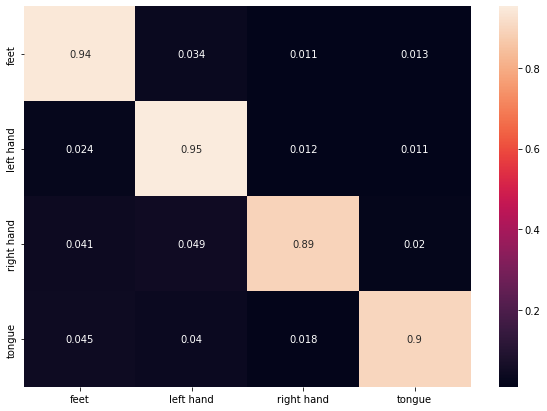

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
array = confusion_matrix(allLabels,allPredicts)
array = array / array.astype(np.float).sum(axis=1)
df_cm = pd.DataFrame(array, index = [i for i in {'left hand', 'right hand','feet','tongue'}],
                  columns = [i for i in {'left hand', 'right hand','feet','tongue'}])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)